In [34]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers, models, datasets
from sklearn.model_selection import train_test_split

In [56]:
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

In the below code I have combined both the train and test set and shuffled this combined dataset. After the suffling, the datset is again split into train and test set with a ratio of 0.3, I did this to get random train and test dataset to get a more accuarate results

In [57]:
combined_images = np.concatenate((train_images, test_images), axis=0)
combined_labels = np.concatenate((train_labels, test_labels), axis=0)

# Shuffle the combined dataset
combined_dataset = list(zip(combined_images, combined_labels))
np.random.shuffle(combined_dataset)

# Unpack the shuffled dataset
shuffled_images, shuffled_labels = zip(*combined_dataset)

# Convert back to numpy arrays
shuffled_images = np.array(shuffled_images)
shuffled_labels = np.array(shuffled_labels)

# Split the combined dataset into train and test sets
train_images, test_images, train_labels, test_labels = train_test_split(
    shuffled_images, shuffled_labels, test_size=0.3, random_state=42)

In the below code I have normalized the pixel intensities so that the value so the model is not sensitve to perticular intensities and neglect some.

In [58]:
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

Below code is the main Neurla network model with 3 hidden layers of size: 256, 128, and 64 neuron. each hidden layer has a activation of RElu and the final output layer has 10 output neurons and softmax activation. The input image of 28 * 28 is flattend into array of 784 values. THe model is trained with Adam optimization and crossentropy loss function. 

In [67]:
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [68]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [69]:
history = model.fit(train_images, train_labels, epochs= 10, batch_size= 128, validation_split=0.2)

Epoch 1/10
307/307 [==============================] - 12s 38ms/step - loss: 0.6035 - accuracy: 0.7870 - val_loss: 0.4529 - val_accuracy: 0.8348
Epoch 2/10
307/307 [==============================] - 11s 36ms/step - loss: 0.4084 - accuracy: 0.8526 - val_loss: 0.4052 - val_accuracy: 0.8507
Epoch 3/10
307/307 [==============================] - 11s 35ms/step - loss: 0.3582 - accuracy: 0.8689 - val_loss: 0.3632 - val_accuracy: 0.8643
Epoch 4/10
307/307 [==============================] - 12s 38ms/step - loss: 0.3261 - accuracy: 0.8790 - val_loss: 0.3910 - val_accuracy: 0.8556
Epoch 5/10
307/307 [==============================] - 10s 33ms/step - loss: 0.3065 - accuracy: 0.8878 - val_loss: 0.3466 - val_accuracy: 0.8748
Epoch 6/10
307/307 [==============================] - 11s 35ms/step - loss: 0.2917 - accuracy: 0.8914 - val_loss: 0.3407 - val_accuracy: 0.8756
Epoch 7/10
307/307 [==============================] - 10s 34ms/step - loss: 0.2830 - accuracy: 0.8952 - val_loss: 0.3357 - val_accuracy:

In [70]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Loss: {test_loss}")

657/657 [==============================] - 1s 1ms/step - loss: 0.3562 - accuracy: 0.8809
Test Accuracy: 0.8809047341346741
Test Loss: 0.35619986057281494


-Above we can see that the test dataset is used to test the above trained model and we get a accuaray of 88.09% and a loss of 0.35 on the test dataset.
-Below is a graph plot of the train set loss and Test set loss. As we can see the train test keeps decreasing weheras the test loss first decreases fast and after some epochs it continues to decrease at a very slow rate or even increase sometimes.

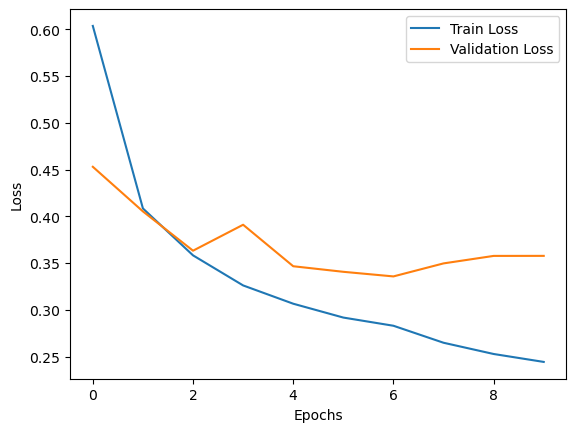

In [71]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [75]:
sample_indices = np.random.choice(test_images.shape[0], 3)
sample_images = test_images[sample_indices]
sample_labels = test_labels[sample_indices]

Below we can see 3 images, their actual class and predicted class. as we can see each image has proabablities for each class and the highest class is labeled as the image class for the prediction. This is done using softmax activation. 

In [76]:
predictions = model.predict(sample_images)

1/1 [==============================] - 0s 19ms/step


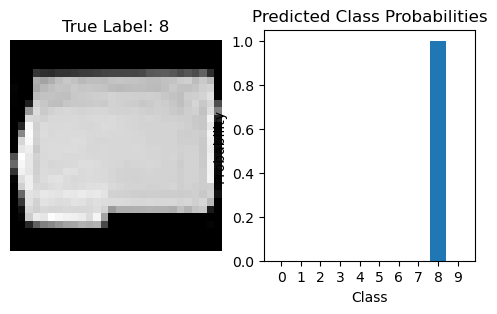

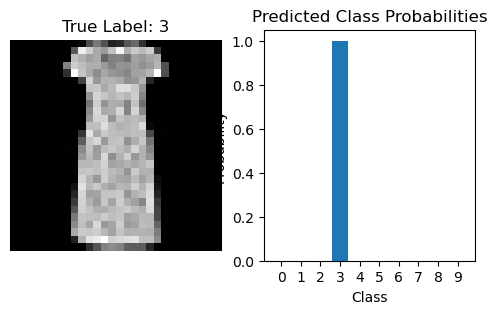

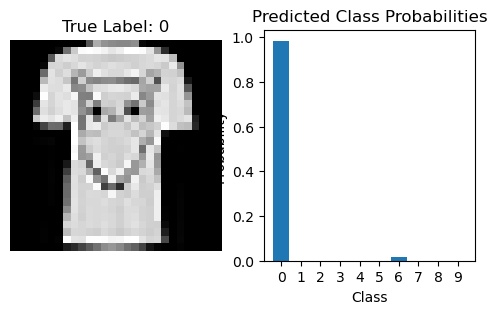

In [77]:
for i in range(3):
    plt.figure(figsize=(6, 3))
    plt.subplot(1, 2, 1)
    plt.imshow(sample_images[i], cmap='gray')
    plt.title(f"True Label: {sample_labels[i]}")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.bar(range(10), predictions[i])
    plt.title("Predicted Class Probabilities")
    plt.xlabel("Class")
    plt.ylabel("Probability")
    plt.xticks(range(10), [str(i) for i in range(10)])
    plt.show()